<a href="https://colab.research.google.com/github/alinaiil/ITMO-applied-mathematics-4sem/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Выполнила: Ильясова Алина

Группа: М32021

---

Лабораторная работа #4
"Методы решения СЛАУ"

Данная лабораторная работа рассматривает прямые и итерационные методы решения СЛАУ, а также конкретные примеры работы этих методов на системах, сгенерированных разными алгоритмами.
Прямые методы решения СЛАУ используют матричные преобразования, в данной лабораторной работе будут рассмотрены метод Гаусса и метод LU-разложения. Итерационные методы решения СЛАУ не находят точное решение за конечное число шагов, а ищут приближение некоторой точности, итерация за итерацией улучшая предыдущую догадку.

Для начала сгенерируем матрицы, которые будут представлять собой набор коэффициентов при "иксах" нашей СЛАУ. В тексте условия лабораторной работы представлено два метода генерации таких матриц: генерация матриц Гильберта и генерация матриц с использованием сумм строк и рандомайзера. Алгоритм их построения:



1.   Матрицы Гильберта:

$a_{ij}=\frac{1}{i+j-1}$, где $i, j = 1, ..., n$

2.   Матрицы с использованием сумм строк и рандомайзера:

$a_{ij}=\{-4, -3, -2, -1, \ 0\}$, где $i≠j$

$\begin{equation*}
a_{ii}=
 \begin{cases}
  -∑_{i≠j}a_{ij} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ if \ \ \ i > 1
  \\
  -∑_{i≠j}a_{ij}+10^{-k} \ \ \ \ \ \ \ if \ \ \ i = 1,
 \end{cases}
\end{equation*}$

сумма вычисляется только по строке.

Также сразу построим алгоритм нахождения изначально известных решений системы: просто целые числа от 1 до $n$ по порядку, а также правых частей уравнений системы: результат умножения коэффициентов из конкретной строки сгенерированной матрицы на значения ответов из вектора $x$ и последующего сложения значений этих произведений между собой. Для метода Гаусса создадим функцию-заготовку, которая будет склеивать матрицу коэффициентов с вектором правой части уравнений.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import numpy.linalg as lg

def hilbert(n):
  m = np.array([[0.0]*n]*n)
  for i in range(1, n + 1):
    for j in range(1, n + 1):
      m[i - 1][j - 1] = 1.0 / (i + j - 1.0)
  return m

def matrix(k):
  m = np.array([[0.0]*k]*k)
  for i in range(k):
    for j in range(k):
      if (i != j):
        m[i][j] = rnd.randint(-4, 0)
  for i in range(k):
    m[i][i] = -1.0 * np.sum(m[i])
    if (i == 0):
      m[i][i] += pow(10, -1*k)
  return m

def x_initial(n):
  return np.arange(1, n+1)

def fx(n, matrix, x):
  f = np.array([0.0]*n)
  for i in range(n):
    for j in range(n):
      f[i] += matrix[i][j] * x[j]
  return f

def create_test_matrix(arr, f):
  matrix = np.array([[0.0]*(len(arr) + 1)]*len(arr))
  for i in range(len(arr)):
    for j in range(len(arr) + 1):
      if (j < len(arr)):
        matrix[i][j] = arr[i][j]
      else:
        matrix[i][j] = f[i]
  return matrix

Стоит сразу отметить, что матрицы, генерируемые с помощью этих алгоритмов, не очень устойчивые. Достаточно взглянуть на их числа обусловленности даже для сравнительно небольших n, чтобы это понять.

k_matrix_10 = 2401694259225.432
k_matrix_14 = 8.755342600065259e+16
k_matrix_50 = 3.2006532636403664e+16

k_hilbert_10 = 16024416987428.36
k_hilbert_14 = 6.200786281355982e+17
k_hilbert_50 = 2.3756325491900666e+19


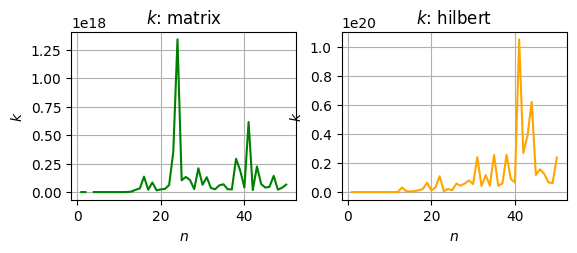

In [ ]:
a = matrix(10)
print('k_matrix_10 =', lg.cond(a))
a = matrix(14)
print('k_matrix_14 =', lg.cond(a))
a = matrix(50)
print('k_matrix_50 =', lg.cond(a))
print()
a = hilbert(10)
print('k_hilbert_10 =', lg.cond(a))
a = hilbert(14)
print('k_hilbert_14 =', lg.cond(a))
a = hilbert(50)
print('k_hilbert_50 =', lg.cond(a))

matrix_k = []
hilbert_k = []
for i in range(50):
  matrix_k.append(lg.cond(matrix(i + 1)))
  hilbert_k.append(lg.cond(hilbert(i + 1)))

fig = plt.figure()
ax1 = fig.add_subplot(221)
plt.ylabel('$k$')
plt.xlabel('$n$')
plt.plot(range(1, 51), matrix_k, color="green")
plt.grid()
ax2 = fig.add_subplot(222)
plt.ylabel('$k$')
plt.xlabel('$n$')
plt.plot(range(1, 51), hilbert_k, color="orange")
plt.grid()
ax1.title.set_text('$k$: matrix')
ax2.title.set_text('$k$: hilbert')

plt.show()

Можно получать чуть более устойчивые матрицы, немного модифицировав алгоритм, в котором мы использовали суммы по строкам и рандомайзер. Теперь он будет выглядеть так:

$a_{ij}=\{-4, -3, -2, -1, \ 0\}$, где $i≠j$

$a_{ii}=-∑_{i≠j}a_{ij}+10^{-i}$, где $i=1,2,...,k$

In [ ]:

def matrix_small_k(k):
  m = np.array([[0.0]*k]*k)
  for i in range(k):
    for j in range(k):
      if (i != j):
        m[i][j] = rnd.randint(-4, 0)
  for i in range(k):
    m[i][i] = -1.0 * np.sum(m[i]) + pow(10, -1*(i+1))
  return m

Тогда значения числа обусловленности станут гораздо меньше.

k_matrix_small_k_10 = 3827.375494499667
k_matrix_small_k_14 = 5409.243528855951
k_matrix_small_k_50 = 75961.81154875284


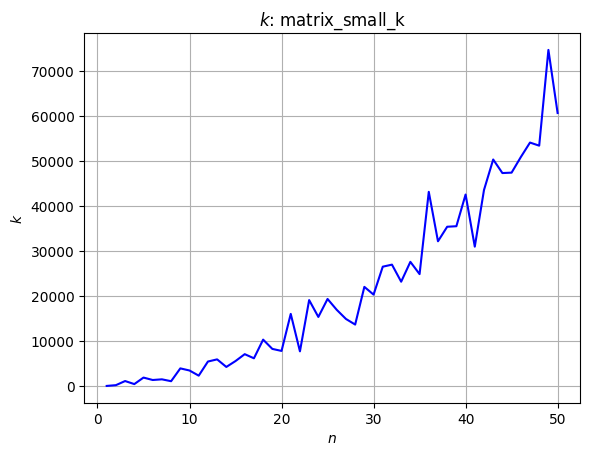

In [ ]:
a = matrix_small_k(10)
print("k_matrix_small_k_10 =", lg.cond(a))
a = matrix_small_k(14)
print("k_matrix_small_k_14 =", lg.cond(a))
a = matrix_small_k(50)
print("k_matrix_small_k_50 =", lg.cond(a))

matrix_small_k_k = []
for i in range(50):
  matrix_small_k_k.append(lg.cond(matrix_small_k(i + 1)))
plt.title("$k$: matrix_small_k")
ax = plt.gca()
ax.set_xlabel("$n$")
ax.set_ylabel("$k$")
ax.grid()
plt.plot(range(1, 51), matrix_small_k_k, color="blue")
plt.show()

**Метод Гаусса**

Метод Гаусса — это прямой метод решения СЛАУ. Он состоит из двух частей: прямой ход и обратный. Для начала мы "спускаемся" по матрице вниз, придавая ей треугольный вид, а затем "поднимаемся", по цепочке находя значения переменных.
Конечно, с коэффициентами везёт далеко не всегда, и невероятно редко все они делятся друг на друга нацело, поэтому мы имеем дело с дробными числами. Однако у дробных чисел после запятой может быть вплоть до бесконечности значащих цифр, и какую-то часть нам придётся опускать в ходе наших компьютерных вычислений, от чего теряется точность и растёт погрешность. Так, при очень маленьких ведущих элементов уменьшается точность от деления, соответственно, метод делает больше ошибок в значениях. Из-за этого используем улучшенный метод Гаусса — метод Гаусса с выбором ведущего элемента. Теперь каждый раз мы не будем брать ведущий элемент, который просто стоит на нужном месте, а сначала сравним его со всеми элементами в этом столбце, но ниже по строчкам, и если найдём элемент больше по модулю, поменяем строчки местами. Так погрешность значительно уменьшится.

In [ ]:
def gauss(matrix):
  n = len(matrix)
  for col in range(n):
    max_el = matrix[col][col]
    row = col
    for i in range(col + 1, len(matrix)):
        if np.abs(matrix[i][col]) > np.abs(max_el):
            max_el = matrix[i][col]
            row = i
    matrix[col], matrix[row] = np.copy(matrix[row]), np.copy(matrix[col])

    for i in range(col + 1, n):
      d = 1.0 * matrix[i][col] / (1.0 * matrix[col][col])
      for j in range(col, n+1):
        matrix[i][j] -= d*matrix[col][j]

  x_found = np.array([0.0]*n)
  for col in range(n-1, -1, -1):
    sum = 0
    for j in range(col + 1, n):
      sum += matrix[col][j] * x_found[j]
    x_found[col] = (matrix[col][n] - sum) / matrix[col][col]
  return x_found

Проверим работу метода для начала на устойчивой матрице.

In [ ]:
n = 10
a = matrix_small_k(n)
x1 = x_initial(n)
f1 = fx(n, a, x1)
print("Answer is:", gauss(create_test_matrix(a,f1)))
print()
n = 50
a = matrix_small_k(n)
x1 = x_initial(n)
f1 = fx(n, a, x1)
print("Answer is:",gauss(create_test_matrix(a,f1)))
print()
n = 100
a = matrix_small_k(n)
x1 = x_initial(n)
f1 = fx(n, a, x1)
print("Answer is:",gauss(create_test_matrix(a,f1)))

Answer is: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]

Answer is: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]

Answer is: [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100.]


Теперь проверим на неустойчивых матрицах и сделаем вывод о том, что хоть прямые методы и находят ответ за конечное число итераций, погрешность при компьютерных вычислениях с увеличением размера матрицы и увеличением числа обусловленности растёт, и если на небольших матрицах ответ ещё более или менее похож на то, что мы хотели бы увидеть, при больших значениях $n$ узнать изначально загаданные решения не представляется возможным из-за сильных погрешностей.

In [ ]:
n = 10
a = matrix(n)
x1 = x_initial(n)
f1 = fx(n, a, x1)
print("Answer is (matrix 10x10):", gauss(create_test_matrix(a,f1)))
print()
n = 50
a = matrix(n)
x1 = x_initial(n)
f1 = fx(n, a, x1)
print("Answer is (matrix 50x50):",gauss(create_test_matrix(a,f1)))
print()
n = 10
a = hilbert(n)
x1 = x_initial(n)
f1 = fx(n, a, x1)
print("Answer is (hilbert 10x10):", gauss(create_test_matrix(a,f1)))
print()
n = 50
a = hilbert(n)
x1 = x_initial(n)
f1 = fx(n, a, x1)
print("Answer is (hilbert 50x50):",gauss(create_test_matrix(a,f1)))

Answer is (matrix 10x10): [0.99989292 1.99989292 2.99989292 3.99989292 4.99989292 5.99989292
 6.99989292 7.99989292 8.99989292 9.99989292]

Answer is (matrix 50x50): [-33.91176471 -32.91176471 -31.91176471 -30.91176471 -29.91176471
 -28.91176471 -27.91176471 -26.91176471 -25.91176471 -24.91176471
 -23.91176471 -22.91176471 -21.91176471 -20.91176471 -19.91176471
 -18.91176471 -17.91176471 -16.91176471 -15.91176471 -14.91176471
 -13.91176471 -12.91176471 -11.91176471 -10.91176471  -9.91176471
  -8.91176471  -7.91176471  -6.91176471  -5.91176471  -4.91176471
  -3.91176471  -2.91176471  -1.91176471  -0.91176471   0.08823529
   1.08823529   2.08823529   3.08823529   4.08823529   5.08823529
   6.08823529   7.08823529   8.08823529   9.08823529  10.08823529
  11.08823529  12.08823529  13.08823529  14.08823529  15.08823529]

Answer is (hilbert 10x10): [1.00000001 1.99999956 3.00000937 3.99991457 5.00040852 5.99887472
 7.00184915 7.99821075 9.00094031 9.99979304]

Answer is (hilbert 50x50): [ 9.

**$LU$-разложение**

Ещё один прямой метод решения СЛАУ. Как понятно уже из названия, мы раскладываем нашу исходную матрицу коэффициентов, и раскладываем мы её на две треугольные матрицы: $L$ и $U$. По теореме если ни один главный минор квадратной матрицы $A$ (наша матрица коэффициентов) не равен нулю, то существуют нижняя треугольная матрица $L$ и верхняя треугольная матрица $U$ такие, что $A=L⋅U$:

$
\begin{bmatrix}
1& 0& ...& 0\\
l_{21}& 1& ...& 0\\
...& ...& ...& ...\\
l_{n1}& l_{n2}& ...& 1
\end{bmatrix}
\begin{bmatrix}
u_{11}& u_{12}& ...& u_{1n}\\
0& u_{22}& ...& u_{2n}\\
...& ...& ...& ...\\
0& 0& ...& u_{nn}
\end{bmatrix}
=
\begin{bmatrix}
a_{11}& a_{12}& ...& a_{1n}\\
a_{21}& a_{22}& ...& a_{2n}\\
...& ...& ...& ...\\
a_{n1}& a_{n2}& ...& a_{nn}
\end{bmatrix}
$

Но как найти матрицы $L$ и $U$? После перемножения матриц в общем виде мы получим систему уравнений, обобщив которую, мы придём к двум уравнениям — формулам получения определённых элементов искомых матриц, из которых их (матрицы) можно собрать.

$u_{ij}=a_{ij}-∑^{i - 1}_{k=1}l_{ik}⋅u_{kj}, \ \ \ \ i ≤ j$

$l_{ij}=\frac{a_{ij} - ∑^{j - 1}_{k=1}l_{ik}⋅u_{kj}}{u_{jj}}, \ \ \ \ \ \ \ \ \ \  \ \ \ \ \ i > j$

Итак, наша матрица $A$ превращается в матрицу $LU$, и тогда стандартную запись СЛАУ $Ax=b$ можно записать как $LUx=b$. Введём новый вектор $y=(y_1, y_2, ..., y_n)^T$, и перепишем $LUx=b$ в виде системы:

\begin{equation*}
 \begin{cases}
   Ly = b,
   \\
   Ux = y
 \end{cases}
\end{equation*}

Нетрудно догадаться, как найти ответ, ведь обе матрицы в системе треугольные, и обе СЛАУ решаются по аналогии с обратным ходом метода Гаусса.

$y_i=b_i-∑^{i}_{k = 1}l_{ik}⋅y_k$

$x_i = \frac{y_i - ∑^{n}_{k = i + 1}u_{ik}⋅x_k}{u_{ii}}$

Причём $x$ ищем в обратном порядке.
Для меньшего потребления памяти будем хранить разреженные матрицы $L$ и $U$ в разреженном виде с помощью инструментов библиотеки SciPy.

In [ ]:
import scipy.sparse as sparse

def get_lu(m):
  n = len(m)
  l = np.array([[0.0]*n]*n)
  u = np.array([[0.0]*n]*n)
  for j in range(n):
    l[j][j] = 1.0
    for i in range(j + 1):
      s = sum([l[i][k] * u[k][j] for k in range(i)])
      u[i][j] = m[i][j] - s
    for i in range(j, n):
      s = sum([l[i][k] * u[k][j] for k in range(j)])
      l[i][j] = (m[i][j] - s) / u[j][j]
  return sparse.csr_matrix(l), sparse.csr_matrix(u)

def solve_lu(m, f):
  n = len(m)
  l, u = get_lu(m)
  y = np.array([0.0]*n)
  for i in range(n):
    s = sum(l[i, k] * y[k] for k in range(i))
    y[i] = f[i] - s

  x_found = np.array([0.0]*n)
  for i in range(n-1, -1, -1):
    s = sum(u[i, k]*x_found[k] for k in range(i + 1, n))
    x_found[i] = 1.0 * (y[i] - s) / u[i, i]

  return x_found

n = 200
a = matrix_small_k(n)
x1 = x_initial(n)
f1 = fx(n, a, x1)
print(solve_lu(a, f1))

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 

**Итерационный метод Зейделя**

Метод Зейделя — итерационный метод, который не гарантирует точного ответа за конечное число итераций.
Переведём в $j$-м уравнении в правую часть все члены, содержацие $x_i$ для $i > j$. Тогда получим следующее:
$(L + D)\vec{x}=-U\vec{x}+\vec{b}$, где $U$ — верхняя треугольная часть $A$, $D$ — матрица нулей, в которой только диагональ заполнена соответствующими диагональными элементами исходной матрицы $A$, $L$ — нижняя треугольная часть $A$.
Мы выбираем какое-то начальное приближение $\vec{x}^{(0)}$, в моём случае я выбрала $\frac{b_i}{a_{ii}}$, и запускаем итерационный процесс, который строится следующим образом:

$(L+D)\vec{x}^{(k + 1)}=-U\vec{x}^{(k)}+\vec{b}, \ \ \ \ \ \ \ k = 0, 1, 2, ...$

То есть, получаем формулу для $x^{(k+1)}_i$:

$x^{(k+1)}_i=∑^{i-1}_{j=1}c_{ij}⋅x^{(k+1)}_j+∑^{n}_{j=1}c_{ij}⋅x^{(k)}_j+d_i, \ \ \ \ i=1, 2, ..., n$, в которой:

$d_i = \frac{b_i}{a_{ii}}, \ \ \ \ \ \ \ i = 1, 2, ..., n$

\begin{equation*}
c_{ij} =
 \begin{cases}
   -\frac{a_{ij}}{a_{ii}}, \ \ \ i ≠ j
   \\
   0, \ \ \ \ \ \ \ \ i = j
 \end{cases}
 , \ \ \ \ i = 1, 2, ..., n
\end{equation*}

In [ ]:
def seidel(a, b, eps, max_iter):
  n = len(a)
  x_found = ([0.0]*n)
  for i in range(n):
    x_found[i] = b[i] / a[i][i]
  iter = 0
  x_new = np.copy(x_found)
  while np.max(np.abs(x_new - x_found)) <= eps:
    iter += 1
    x_new = np.copy(x_found)
    for i in range(n):
      s1 = sum(a[i][j] * x_new[j] for j in range(i))
      s2 = sum(a[i][j] * x_found[j] for j in range(i + 1, n))
      s = s1 + s2
      x_new[i] = 1.0 * (b[i] - s) / a[i][i]
    x_found = x_new
    if iter>=max_iter:
      break
  return x_found, iter

a = matrix_small_k(10)
xs = x_initial(10)
b = fx(10, a, xs)
print(seidel(a, b, 1e-2, 10000))

(array([0.9999997, 1.9999997, 2.9999997, 3.9999997, 4.9999997, 5.9999997,
       6.9999997, 7.9999997, 8.9999997, 9.9999997]), 10000)


Теперь сравним прямые и итерационный методы по эффективности. Для этого измерим количество времени, которое необходимо для выполнения того или иного метода, и сведём в таблицу.

In [ ]:
n = 10
a1 = hilbert(n)
x1 = x_initial(n)
f1 = fx(n, a1, x1)
for_gauss1 = create_test_matrix(a1,f1)
n = 50
a2 = hilbert(n)
x2 = x_initial(n)
f2 = fx(n, a2, x2)
for_gauss2 = create_test_matrix(a2,f2)
n = 100
a3 = hilbert(n)
x3 = x_initial(n)
f3 = fx(n, a3, x3)
for_gauss3 = create_test_matrix(a3,f3)
n = 200
a4 = hilbert(n)
x4 = x_initial(n)
f4 = fx(n, a4, x4)
for_gauss4 = create_test_matrix(a4,f4)

n_array = np.array([1, 50, 100, 200])

+--------+-----------------------+---------------------+--------------------+--------------------+
| Method |         n = 10        |        n = 50       |      n = 100       |      n = 200       |
+--------+-----------------------+---------------------+--------------------+--------------------+
| Gauss  | 0.0012259380000614328 |   0.16634182100006  | 1.1054463959999339 | 2.439787016000082  |
|   LU   |  0.003658448999885877 | 0.07452899100007926 | 0.4612579430004189 | 2.5669534489998114 |
| Seidel |   1.1523706690004474  |  13.745098022000093 | 51.95361143500031  | 203.1604649210003  |
+--------+-----------------------+---------------------+--------------------+--------------------+


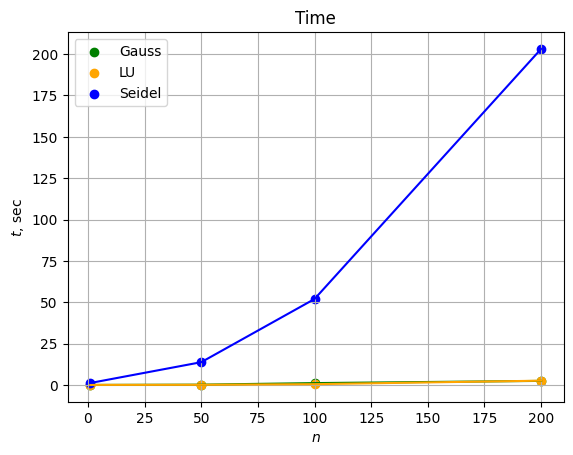

In [ ]:
from prettytable import PrettyTable
from timeit import default_timer as timer

time = PrettyTable()
time.field_names = ["Method", "n = 10", "n = 50", "n = 100", "n = 200"]

t = timer()
gauss(for_gauss1)
g10 = timer() - t
t = timer()
gauss(for_gauss2)
g50 = timer() - t
t = timer()
gauss(for_gauss3)
g100 = timer() - t
t = timer()
gauss(for_gauss4)
g200 = timer() - t
g_array = np.array([g10, g50, g100, g200])
time.add_row(["Gauss", g10, g50, g100, g200])

t = timer()
solve_lu(a1, f1)
lu10 = timer() - t
t = timer()
solve_lu(a2, f2)
lu50 = timer() - t
t = timer()
solve_lu(a3, f3)
lu100 = timer() - t
t = timer()
solve_lu(a4, f4)
lu200 = timer() - t
lu_array = np.array([lu10, lu50, lu100, lu200])
time.add_row(["LU", lu10, lu50, lu100, lu200])


t = timer()
seidel(a1, f1, 1e-7, 10000)
s10 = timer() - t
t = timer()
seidel(a2, f2, 1e-7, 10000)
s50 = timer() - t
t = timer()
seidel(a3, f3, 1e-7, 10000)
s100 = timer() - t
t = timer()
seidel(a4, f4, 1e-7, 10000)
s200 = timer() - t
s_array = np.array([s10, s50, s100, s200])
time.add_row(["Seidel", s10, s50, s100, s200])

print(time)

plt.title("Time")
ax = plt.gca()
ax.set_xlabel("$n$")
ax.set_ylabel("$t$, sec")
ax.grid()

plt.scatter(n_array, g_array, label="Gauss", color="green")
plt.scatter(n_array, lu_array, label="LU", color="orange")
plt.scatter(n_array, s_array, label="Seidel", color="blue")
plt.plot(n_array, g_array, color="green")
plt.plot(n_array, lu_array, color="orange")
plt.plot(n_array, s_array, color="blue")

plt.legend()
plt.show()

Методы Гаусса и $LU$-разложения показывают практически одинаковые результаты, а метод Зейделя с ростом размера матрицы работает всё медленнее и медленнее. Однако в вопросах памяти особенно для больших матриц метод Зейделя гораздо эффективнее, так как ему не нужно производить дорогие операции по копированию строк или изменению элементов. Также итерационные методы могут настраиваться на нужную точность и мы тем самым всё-таки можем регулировать и время их работы в том числе, тогда как прямые методы всегда работают одинаково и на одних и тех же матрицах будут тратить одинаковое количество времени на решение.